In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## outlier detection


<Axes: >

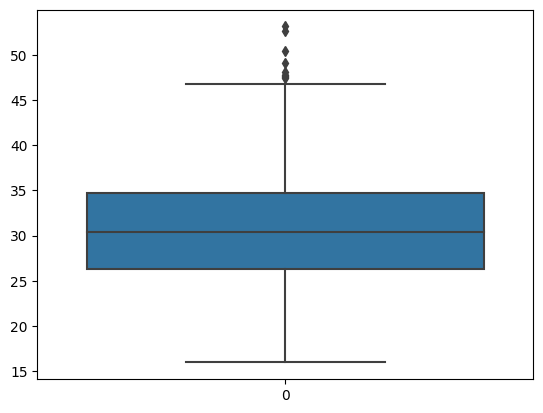

In [ ]:
sns.boxplot(df.bmi)

## outlier removal by replacement with median

In [ ]:
q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)

In [ ]:
print(q1)
print(q3)

26.22
34.485


In [ ]:
IQR = q3-q1

In [ ]:
IQR

8.265

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

46.8825

In [ ]:
lower_limit = q1-1.5*IQR
lower_limit

13.822499999999998

In [ ]:
df.median()

<ipython-input-34-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


age           39.0000
bmi           30.3000
children       1.0000
charges     9361.3268
dtype: float64

In [ ]:
df['bmi']= np.where(df['bmi']>upper_limit,30,df['bmi'])

<Axes: >

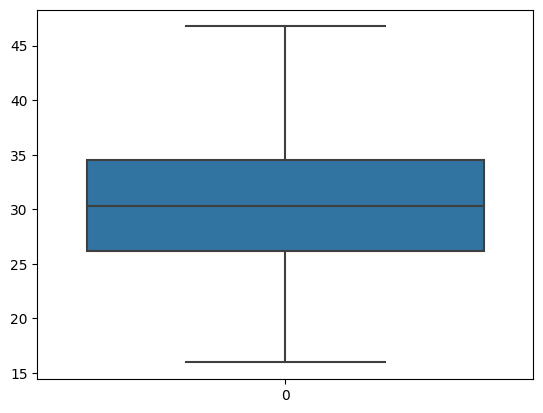

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
df.shape

(1329, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,30.537348,1.096313,13212.333374
std,14.047835,5.919946,1.207928,11997.236429
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4738.268200
50%,39.000000,30.300000,1.000000,9361.326800
75%,51.000000,34.485000,2.000000,16586.497710
max,64.000000,46.750000,5.000000,62592.873090


## 1.outlier removal using IQR

<Axes: >

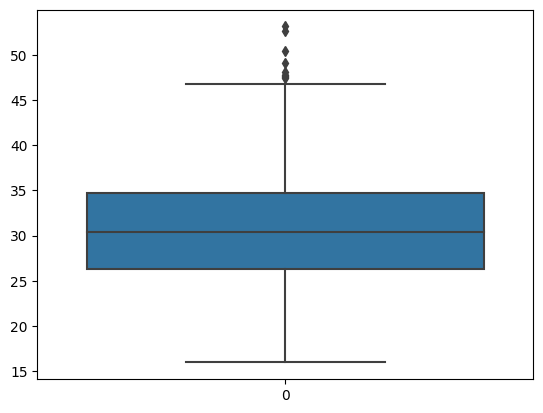

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)

In [ ]:
IQR =q3-q1

In [ ]:
upper_limit =q3+1.5*IQR

In [ ]:
upper_limit

47.290000000000006

In [ ]:
df = df[df.bmi<upper_limit]

<Axes: >

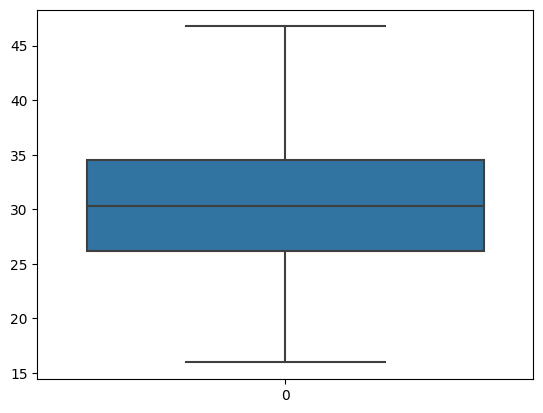

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
df.shape

(1329, 7)

## z score for removal

<Axes: >

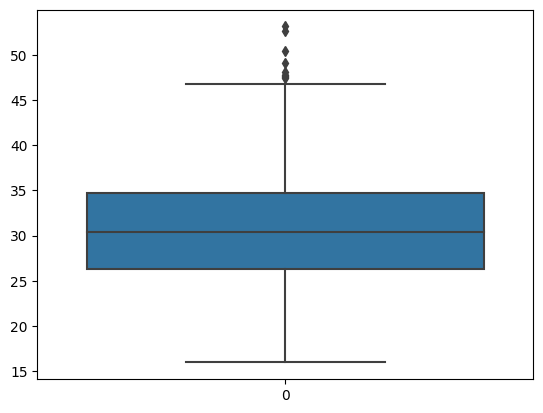

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
from scipy import stats

In [ ]:
bmi_zscore = stats.zscore(df.bmi)
bmi_zscore

0      -0.453320
1       0.509621
2       0.383307
3      -1.305531
4      -0.292556
          ...   
1333    0.050297
1334    0.206139
1335    1.014878
1336   -0.797813
1337   -0.261388
Name: bmi, Length: 1338, dtype: float64

In [ ]:
df_z = df[np.abs(bmi_zscore)<=3]

<Axes: >

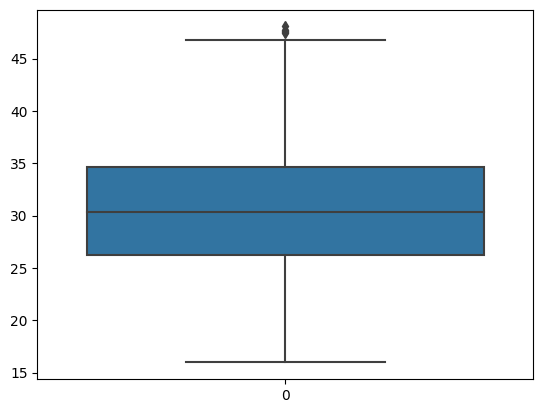

In [ ]:
sns.boxplot(df_z.bmi)

In [ ]:
df_z.shape

(1334, 7)

## percentile

<Axes: >

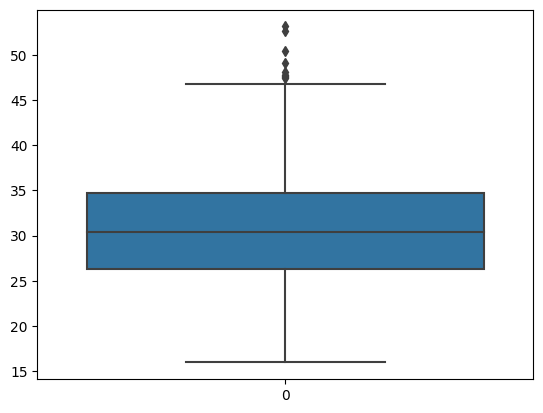

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
p99 = df.bmi.quantile(0.99)


In [ ]:
p99

46.40789999999996

In [ ]:
df = df[df.bmi<=p99]

<Axes: >

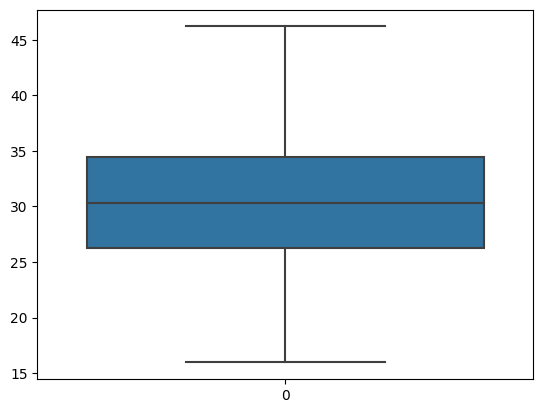

In [ ]:
sns.boxplot(df.bmi)

In [ ]:
df.shape

(1324, 7)